Abre este notebook en binder: https://mybinder.org/v2/gh/srichers/ComputationalAstroPrimer/answers?labpath=answers%2FTOV%2FNeutronStarStructure.ipynb

<b>Estrellas de neutrones son los laboratorios de física mas extraños que podemos hacer aquí en la Tierra.</b> Hay misterios ocultos en estas estrellas y aprenderíamos mucho si tan solo pudiéramos verlos en detalle. Una de las preguntas mas grandes de física hoy es, ¿como funciona la fuerza nuclear fuerte? Esta es la clave de describir núcleos de primeros principios, y los detalles de una fuerza tan fundamental es importante en todas las áreas de la física y astronomía.

<b>Comparar nuestras estrellas teoreticas contra estrellas reales va a verificar si este ecuacion de estado sea correcto.</b>

# Para Comenzar

Hay bibliotecas de código que necesitamos importar.

- <b>Numpy</b> contiene metodos y objetos que dejan que hacemos operaciones matematicas fácilmente y rapidamente.
- Vamos a usar <b>bisect</b> para invertir ecuaciones numéricamente.
- <b>Matplotlib</b> deja que podemos dibujar graficos.

In [2]:
import numpy as np
import bisect
import matplotlib.pyplot as plt

Hay varios <b>constantes de la naturaleza</b> que necesitaremos en nuestras calculaciones.

In [3]:
c = 2.99792458e10 # velocidad de luz, cm/s
h = 6.6260755e-27 # constante de Planck, erg*s
G = 6.67259e-8 # constante de gravitacion, cm^3/g/s
e = 4.8032068e-10 # cargar del electron, esu
me = 9.1093897e-28 # masa del electron, g
mB = 1.66057e-24 # masa del baryon, g
Msol = 1.99e33 # masa del sol, g
Rsol = 6.96e10 # radio del sol, cm
km = 1e5 # cm

# Ingrediente 1: Ecuación de Estado

El primer pedazo del rompecabezas es la ecuación de estado, que <b>relaciona el presión con la densidad</b>. Usualmente se considera que las estrellas de neutrones han tenido mucho tiempo para enfriar. Por ende, se asume que son tan frías que no tenemos que pensar de temperatura. Sin embargo, los neutrones son fermiones degenerados, y por eso pueden tener mucha energía. De hecho, pueden tener tanta energía a nivel relativista.

Encuentra las ecuaciones 11-15 en la Ref. [1] (reproducidos de Chandrasekhar [2]), que muestran como describir este proceso de manera analítica. Tengan una cuenta la notación y nomenclatura empleada en dicho artículo:
- La <b>densidad total</b> $\rho = \rho_\mathrm{masa} + \rho_\mathrm{energia}$ es la densidad de masa y energía respectivamente (unidades de erg/cm$^3$).
- La <b>densidad de masa</b> es $\rho_\mathrm{masa} = \mu_0 N/V$ (g/cm$^3$).
- $N$ y $V$ son numero de partículas y el volumen respectivamente. 
Sin embargo esto no es tan importante ya que nunca serán usados.

No hay una forma cerrada de los ecuaciones, y por eso usaremos una parametrización para éstas. El símbolo $t$ no significa nada - solo es algo útil para las matemáticas.


- <b>Chandrasekhar, S.</b> ”The highly collapsed configurations of a stellar mass (Second paper).” Monthly Notices to the Royal Astronomical Society, 95 (1935). http://articles.adsabs.harvard.edu/pdf/1935MNRAS..95..207C
-  <b>Oppenheimer, J. R., & Volkoff, M.</b> ”On Massive Neutron Star Cores.” Physical Review, 55 (1939). http://www.mpia.de/homes/fendt/Lehre/Vorlesung_CO/1939_oppenheimer_volkoff.pdf

## Funcion para interpolar los datos

La física de materia densa trata de funciones complejas. <b>Necesitaremos resolver ecuaciones que no son posibles resolver analiticamente.</b> Aquí escribimos una funcion para poder interpolar una funcion para hacer que nuestro trabajo en el futuro sea mas facil.

<b>Descomenten la función y ejecuten el codigo</b> para probar la función.

yPrueba = 0.12962962962962965


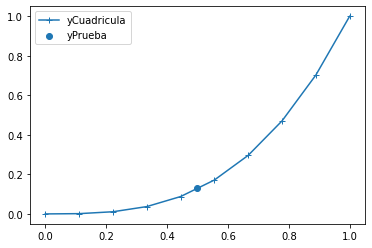

In [6]:
# xEn - x donde queremos obtener un valor d y
# xCuadricula - un matriz de valores de x
# yCuadricula - un matriz de valores de y en los lugares x
#def interpolar(xEn, xCuadricula, yCuadricula):
#    # get the upper indes
#    i = bisect.bisect_right(xCuadricula, xEn, lo=0, hi=len(xCuadricula))
#
#    # check for degenerate case
#    yDerecha    = yCuadricula[i  ];
#    xDerecha    = xCuadricula[i  ];
#    yIzquierda  = yCuadricula[i-1];
#    xIzquierda  = xCuadricula[i-1];
#    if(yDerecha == yIzquierda):
#        return yDerecha;
#
#    # do the interpolation
#    inclinacion = (yDerecha-yIzquierda) / (xDerecha-xIzquierda);
#    ySalida = yIzquierda + (xEn-xIzquierda)*inclinacion;
#    return ySalida;

xCuadricula = np.linspace(0,1,10)
yCuadricula = xCuadricula**3
xPrueba = 0.5
yPrueba = interpolar(xPrueba, xCuadricula, yCuadricula)
plt.plot(xCuadricula, yCuadricula,marker="+",label="yCuadricula")
plt.scatter(xPrueba,yPrueba, label="yPrueba")
plt.legend()
print("yPrueba =", yPrueba)

## La clase de la ecuación de estado: saber la presión y energia interna en cualquier densidad de masa
1. <b>Encuentra la ecuación de estado de materia densa relativistas en el articulo de Oppenheimer y Volkoff.</b> ¿Que tipo de ecuación es? ¿Si tenemos la densidad de masa, podemos calcular la presión analiticalmente? ¿Si tenemos la presión, podemos calcular la densidad de masa analiticalmente?
1. En el constructor \_\_init\_\_():
    1. <b>Descomenten el primer bloque de código y imprima la matriz 'DensidadDeMasa'.</b> Vamos a encontrar todas las propieadades de la materia de cada uno de estas densidades. ¿A que rango de densidades miramos? ¿Que tan denso son los nucleos de los átomos?
    1. <b>Escriban la expresión para calcular el constante K</b> (Ecuación 13 de [1]). Verifiquen que tiene unidades de densidad de energía.
    1. <b>Usen esta matriz para calcular una matriz de momentos ($\hat{p}$, ecuación 15 de [1]). Verifiquen que tiene unidades de momento.
    1. <b>Usen la matriz de momentos para calcular una matriz de valores de t</b> (Ecuación 14 de [1]). Verifiquen que no tiene unidades.
    1. <b>Usen la matriz de $t$ para calcular una matriz de valores de presion</b> (llamado Presion, ecuación 12) y densidad total (llamado DensidadTotal, ecuación 11). Verifiquen que ambas cantidades tienen unidades de densidad de energía.
    1. <b>Descomenten el ultimo bloque de codigo</b> para guardar los matrices en la clase EDE.
1. Ahora tenemos todos los ecuaciones, pero ¿como podemos calcular la presion si solo sabemos la densidad? <b>Escriben las funciones calcPresion y calcDensidadDeEnergia</b>, usando  calcDensidadDeMasa como un ejemplo.
1. Tambien necesitaremos la densidad total, incluso la masa y la energia. <b>Escriban la función calcDensidadTotal</b>. Asegúrense que las unidades devueltas son los de densidad de masa y no densidad de energía.

In [12]:
class EDE:
    def __init__(self, DensidadDeMasaMin, DensidadDeMasaMax, npoints):
        ## crear matriz de densidad de masa
        ## Paso 2A 
        #log10DensidadDeMasaMin = np.log10(DensidadDeMasaMin)
        #log10DensidadDeMasaMax = np.log10(DensidadDeMasaMax)
        #dlog10DensidadDeMasa = (log10DensidadDeMasaMax - log10DensidadDeMasaMin) / (npoints-1)
        #self.log10DensidadDeMasa = np.array([log10DensidadDeMasaMin + i*dlog10DensidadDeMasa for i in range(npoints)])
        #DensidadDeMasa = 10**self.log10DensidadDeMasa # g/ccm

        # definir constantes para ecuacion 13 de Oppenheimer
        # Paso 2B
        #K = (COMPLETEN) # erg/ccm
        
        # crear matriz de phat
        # Paso 2C
        #phat = (COMPLETEN) # g*cm/s

        # crear matriz de t
        # Paso 2D
        #t = (COMPLETEN) # Paso 2D
        
        # crear matrices de presion y densidad de energia
        # Paso 2E
        #DensidadTotal = (COMPLETEN) # erg/ccm # Paso 2D
        #Presion       = (COMPLETEN) # erg/ccm # Paso 2D
        #DensidadDeEnergia = (COMPLETEN) # erg/ccm # Paso 2D

        ## crear matrices logaritmicos para interpolacion
        ## Paso 2F
        #self.log10DensidadDeMasa    = np.log10(DensidadDeMasa)
        #self.log10Presion           = np.log10(Presion)
        #self.log10DensidadDeEnergia = np.log10(DensidadDeEnergia)
        
        return None
        

    # interpolar presión basado en la densidad de masa
    # Paso 3
    #def calcPresion(self,DensidadDeMasa): # erg/ccm
    #    x = np.log10(DensidadDeMasa)
    #    xgrid = self.log10DensidadDeMasa
    #    ygrid = self.log10Presion
    #    return 10**interpolar(x, xgrid, ygrid)

    # interpolar densidad de masa dado la presión
    def calcDensidadDeMasa(self,Presion): # g/ccm
        #x = np.log10(Presion)
        #xgrid = self.log10Presion
        #ygrid = self.log10DensidadDeMasa
        return 10**interpolar(x, xgrid, ygrid)

    # interpolar la densidad de energía basado en la densidad de masa
    # Paso 3
    #def calcDensidadDeEnergia(self, Presion): # erg/ccm
    #    x = np.log10(Presion)
    #    xgrid = self.log10Presion
    #    ygrid = self.log10DensidadDeEnergia
    #    return 10**interpolar(x, xgrid, ygrid)
    
    # calcular la densidad total basado en la presión
    # Paso 4
    #def calcDensidadTotal(self, Presion): # g/ccm
    #    return self.calcDensidadDeEnergia(Presion)/c**2 + self.calcDensidadDeMasa(Presion)
    
# inicializar la ecuacion de estadio.
# Solo nos importan las densidades entre 1e10 y 1e20 g/ccm,
# pero usamos un alcance mas grande para ver como queda.
# Calcular 200 puntas, entre de la clase EDE interpola.
ede = EDE(1e9, 1e20, 200)

# Hacer un grafico que mostra la ecuacion de estado
pres,  = plt.loglog(10**ede.log10DensidadDeMasa, 10**ede.log10Presion, label="Presión")
edens, = plt.loglog(10**ede.log10DensidadDeMasa, 10**ede.log10DensidadDeEnergia, label="Densidad de Energía")

# dibujar la leyenda
plt.legend()

# dibujar las etiquas de eje
plt.xlabel("Densidad de Masa (g cm$^{-3}$)")
plt.ylabel("Presion y Densidad de Energia (erg cm$^{-3}$)")
plt.show()

AttributeError: 'EDE' object has no attribute 'log10DensidadDeMasa'

Ahora, tenemos una descripción de materia densa! Pero necesitamos usarlo para calcular propiedades de estrellas de neutrones. <b>Comparar nuestras estrellas teoreticas contra estrellas reales va a verificar si este ecuacion de estado sea correcto.</b>

# Ingrediente 2: Ecuaciónes de la Estructura de Estrellas Relativistas

No vamos a derivar las ecuaciones de la estructura de estrellas relativistas aqui. Pero podemos encontrar las ecuaciones relevantes en la literatura cientifica y convertirles a codigo.

Las cantidades importantes son:
- $\rho_\mathrm{tot}$: la densidad de masa y energia juntos
- $M(r)$: la masa total dentro de un radio $r$
- $P$: la presión

Ahora, el trabajo:

1. <b>Encuentra las ecuaciones de la estructura de estrellas relativistas</b> en el articulo de Oppenheimer y Volkoff</br>
https://journals.aps.org/pr/pdf/10.1103/PhysRev.55.374

1. Antes de implementar las ecuaciones, <b>verifica que podemos recuperar las ecuaciones de la structura de estrellas normales</b> en el limite de una estrella no relativista (i.e., $P << \rho_\mathrm{tot}$).

1. Entonces, <b>escribe el codigo que calcula las derivadas de presion y masa total interna</b>.

1. <b>Ejecuta el codigo</b> y verifica que los numeros coinciden con los esperados (fueron calculados por mí más temprano).

Ahora tenemos las ecuaciones diferenciales que vamos a usar para construir estrellas teoreticas. <b>Comparar nuestras estrellas teoreticas contra estrellas reales va a verificar si este ecuacion de estado sea correcto.</b>

In [13]:
# que tan rápido cambia la presión con el radio
# basado en el radio r, la densidad total, la presión, y la masa total interna en el radio r
# Paso 3
def dPresion_dr(r, DensidadTotal, Presion, MasaTotalInterna): # cm, g/ccm, erg/ccm, g
    #result = (COMPLETEN) # erg/ccm/cm
    return result
    
# que tan rápido cambia la masa total interna con el radio
# basado en el radio r y la densidad total en el radio r
# Paso 3
def dMasaTotalInterna_dr(r, DensidadTotal): # cm, g/ccm
    #result = (COMPLETEN) # g
    return result

r = 1e5 # cm
DensidadDeMasa = 1e12 # g/ccm
Presion = ede.calcPresion(DensidadDeMasa) # erg/ccm
MasaTotalInterna = 1e33 # g

print("dPresion_dr esperado: ", 1.3770551299991524e+28)
print("dPresion_dr calculado: ", dPresion_dr(r, DensidadDeMasa, Presion, MasaTotalInterna))
print()
print("dMasaTotalInterna_dr esperado: ", 1.25663706144e+23)
print("dMasaTotalInterna_dr calculado: ",dMasaTotalInterna_dr(r, DensidadDeMasa))

AttributeError: 'EDE' object has no attribute 'calcPresion'

Tenemos las ecuaciones diferenciales en la computadora! Vamos a <b>integrar las ecuaciones aproximadamente</b> con el método de diferencias finitas. Primero, di cuenta de que una derivada es approximada por un relación de diferencias:

$\frac{df}{dr} \approx \frac{\Delta f}{\Delta r}$

Como así, si sabemos la presion $P$ y masa interna $M$ en un radio $r$, podemos avanzar un paso $dr$ usando

$P(r+dr) \approx P(r) + dr \frac{dP}{dr}$

$M(r+dr) \approx M(r) + dr \frac{dM}{dr}$

<b>Escriben una función que avanza $P$ y $M$ por un paso $dr$.</b>
- `r0` es el radio r
- `Presion0` es la presion en r1
- `MasaTotalInterna0` es la masa total interna dentro de r
- `dr` es el tamaño  del paso
- `ede` es el ecuación de estado que hemos escrito más arriba

In [14]:
# avanzar la presion y masa total interna hacia afuera por un paso dr
def integrar(r0, Presion0, MasaTotalInterna0, dr, ede):

    # calcular la densidad total en radio r0 usando la clases EDE
    #DensidadTotal0 = (COMPLETEN)
    
    # calcular las derivadas en el radio r0 usando las funciones arriba
    #dPdr = (COMPLETEN)
    #dMdr = (COMPLETEN)

    # avanzar el radio, presion, y masa total interna
    #r1 = (COMPLETEN)
    #Presion1          = (COMPLETEN)
    #MasaTotalInterna1 = (COMPLETEN)

    return r1, Presion1, MasaTotalInterna1

Finalmente, escribiremos <b>la función para construir una estrella completa</b>. Vamos a elegir una densidad central, y entonces integrar las ecuaciones hasta que llegamos al superficie. Todo que necesitamos hacer es usar nuestra función `integrar` para tomar muchos pasos.

- `dr` es el tamaño de cada paso, empezando con $r=0$. Valores más peqeños hacen una resolución más precisa.
- `DensidadDeMasaAlCentro` es la densidad de masa al centro de la estrella. Elegimos un valor, y el resto de la estrella será calculado.
- `DensidadDeMasa_parar` es la densidad de masa en que paramos de integrar. Significa la densidad en lo que llamaremos "el superficie".
- `imprimir` deja que imprimos cada paso

1. <b>Descomenten el primer bloque de codigo.</b> Estas son las condiciones en el centro de la estrella, determinadas por la `DensidadDeMasaAlCentro`
1. <b>Escriben la masa total interna dentro del primer paso.</b> Esto es física basica - no piensen mucho en ello.
1. El ciclo while seguirá tomando pasos hasta que la densidad de masa sea sufficientamente peqeño.
    1. <b>Usen la función `integrar`</b> para tomar un paso en r, Presion, y MasaTotalInterna.
    1. <b>Usen la función `ede.calcDensidadDeMasa`</b> para obtener la densidad de masa después del paso.
    1. <b>¿Cuales valores imprimos en cada paso? ¿Que significan?</b>
1. Ejecuten el código más abajo para construir una estrella con una densidad de masa interna de $10^{15}\,\mathrm{g/cm}^3$. <b>¿Que son el radio y masa total de la estrella de neutrones?</b>

In [7]:
def calcularRadioYMasa(dr, DensidadDeMasaAlCentro, DensidadDeMasa_parar, ede, imprimir=False):
    # condiciones iniciales (al centro de la estrella). Tomar el primer paso
    # Paso 1
    r = dr
    DensidadDeMasa = DensidadDeMasaAlCentro
    Presion = ede.calcPresion(DensidadDeMasa) # erg/ccm
    DensidadTotal = ede.calcDensidadTotal(Presion) # g/ccm
    
    # calcular la masa interna despues del primer paso
    # Paso 2
    #MasaTotalInterna = (COMPLETEN) # g
    
    # hacer pasos hasta la densidad de masa esta demasiado pequeno
    i=0
    while DensidadDeMasa > DensidadDeMasa_parar:
        
        # avanzar el radio, la presión, y la masa total interna por un paso dr usando la functión integrar()
        # Paso 3A
        #r, Presion, MasaTotalInterna = (COMPLETEN)
        
        # calcular la densidad de masa en el radio nuevo usando la clase EDE
        # Paso 3B
        #DensidadDeMasa = (COMPLETEN)
        
        # imprimir el radio (km), la densidad de masa (g/ccm), y la masa total interna (g)
        if imprimir and i%1000==0:
            print(str(i)+"\t"+str(r/km)+"\t"+str(DensidadDeMasa)+"\t"+str(MasaTotalInterna/Msol))
        i = i+1
    if imprimir:
        print(str(i)+"\t"+str(r/km)+"\t"+str(DensidadDeMasa)+"\t"+str(MasaTotalInterna/Msol))
        
    return r, MasaTotalInterna



print("Paso   Radio(km)   DensidadDeMasa(g/ccm)   MasaTotalInterna(Msol)")

# constantes que determinan la caulidad de la calculacion
dr = 10 # cm
DensidadDeMasa_parar = 1e10

# Tratar de calcular la masa y radio de solo una estrella de neutrones
DensidadDeMasaAlCentro = 1e15
R, M = calcularRadioYMasa(dr, DensidadDeMasaAlCentro, DensidadDeMasa_parar, ede, True)

Paso   Radio(km)   DensidadDeMasa(g/ccm)   MasaTotalInterna(Msol)
0	0.0002	999999999501047.2	9.1553247979392e-15
1000	0.1002	999750447676359.6	2.29878465981891e-06
2000	0.2002	999002353742313.6	1.834034158110653e-05
3000	0.3002	997756789277418.1	6.18036619240647e-05
4000	0.4002	996015540466355.8	0.00014628156279394473
5000	0.5002	993781102802227.0	0.0002852380315238094
6000	0.6002	991056675631572.2	0.0004919660698158282
7000	0.7002	987846155179875.1	0.0007795462007722598
8000	0.8002	984154126060423.1	0.001160805798756084
9000	0.9002	979985851282826.1	0.0016482793981959587
10000	1.0002	975347260782298.0	0.002254170132899426
11000	1.1002	970244938494614.9	0.0029903124521839844
12000	1.2002	964686108005239.6	0.003868136254202363
13000	1.3002	958678616804472.0	0.004898632570255126
14000	1.4002	952230919184012.2	0.006092320926681828
15000	1.5002	945352057814068.6	0.007459218503136566
16000	1.6002	938051644043135.0	0.009008811197723452
17000	1.7002	930346073302754.9	0.010750028660257913
1800

# Errores Numéricos

Los parametros `dr` y `DensidadDeMasa_parar` fueron elegidos por nosotros. <b>Las propiedades de las estrellas de neutrones deben ser independentes de nuestros elecciones, sino los numeros significan nada de la naturaleza real.</b>.
1. <b>Calcula el radio y la masa con valores diferentes.</b> ¿Que tan grande podemos hacer `dr` antes de que los resultados cambian significativamente?

In [8]:
dr = 10 # cm
DensidadDeMasa_parar = 1e10
DensidadDeMasaAlCentro = 1e15
R, M = calcularRadioYMasa(dr, DensidadDeMasaAlCentro, DensidadDeMasa_parar, ede, False)
print("radio =",R/1e5,"km")
print("masa =",M/Msol,"Msol")

radio = 12.7739 km
masa = 0.6433906698168721 Msol


# Esa fue una estrella. ¿Como ven todas las estrellas de neutrones posibles?

Ahora vamos a calcular la masa y el radio de varias estrellas con densidades centrales diferentes.
1. ¿Que significa la matríz `DensidadesALosCentros`?
1. ¿Que significan las cantidades `ListaDeR` y `ListaDeM`?
1. <b>Ejecuten el codigo abajo para construir varias estrellas.</b> Podría llevar unos minutos.

DensidadDeMasaAlCentro(g/ccm)   Radio(km)   Masa(Msol)
100000000000000.12 20.8438 0.3122007185953981
115139539932644.64 20.293 0.3305360528871063
132571136559011.48 19.7504 0.34953507294450326
152641796717523.7 19.2157 0.36915638973379156
175751062485479.22 18.6887 0.38934670076594363
202358964772515.34 18.1691 0.41003978742742636
232995181051537.97 17.6569 0.4311533094706766
268269579527972.9 17.1518 0.45259440033045656
308884359647747.9 16.6538 0.4742538522096474
355648030622314.44 16.1626 0.49600737091286623
409491506238043.44 15.6784 0.5177160657156247
471486636345739.44 15.201 0.5392272222145924
542867543932385.0 14.7304 0.5603756234978973
625055192527399.4 14.2668 0.5809854240892275
719685673001152.9 13.8103 0.6008726037302283
828642772854683.8 13.3611 0.6198453415526262
954095476349998.0 12.9194 0.6377138923382898
1098541141987560.6 12.4854 0.6542916010938977
1264855216855296.2 12.0595 0.6693972237184894
1456348477501241.0 11.642 0.6828609230602052
1676832936811013.5 11.2332 0.6

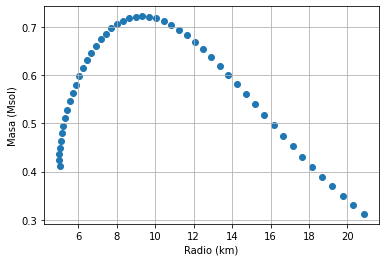

In [9]:
print("DensidadDeMasaAlCentro(g/ccm)   Radio(km)   Masa(Msol)")

# Calcula la masa y radio de muchos estrellas de neutrinos y hacer un grafico
DensidadDeMasaAlCentro0 = 1e14 # g/ccm
DensidadDeMasaAlCentro1 = 1e17 # g/ccm
NumeroDeEstrellas = 50

# Crea la matríz de densiaded centrales. Cada elemento representa una estrella diferente.
DensidadesALosCentros = np.exp(np.linspace(np.log(DensidadDeMasaAlCentro0), np.log(DensidadDeMasaAlCentro1), NumeroDeEstrellas))

# Crea listas vacías de radios y masas.
ListaDeR = []
ListaDeM = []

# Buclar sobre las densidades centrales y obtener un radio y una masa para cada uno
for iEstrella in range(NumeroDeEstrellas):
    DensidadDeMasaAlCentro = DensidadesALosCentros[iEstrella]
    R,M = calcularRadioYMasa(dr, DensidadDeMasaAlCentro, DensidadDeMasa_parar, ede, False)
    ListaDeR.append(R/km)
    ListaDeM.append(M/Msol)
    print(DensidadDeMasaAlCentro, R/km, M/Msol)
    
# Dibujar una gráfica de los datos
plt.grid()
plt.xlabel("Radio (km)")
plt.ylabel("Masa (Msol)")
plt.scatter(ListaDeR, ListaDeM)

# Finalmente, la ciencia!
1.  <b>Entender el gráfico</b>
    1. ¿Cuál punto corresponde a la densidad central más pequeña?
    1. ¿Cuál es la mas grande?
    1. ¿Por qué no podemos hacer una estrella con una masa y radio arbitrariamente grande?
    1. ¿Qué es la masa máxima de un estrella de neutrones con nuestra teoría?
    
1. <b>Comparar con estrellas reales.</b> Diríjanse al vínculo https://stellarcollapse.org/index.php/nsmasses.html. Se puede ver que las masas de estrellas de neutrones tienen barras de error con tamaños muy diferentes.
    1. ¿Cuál es la masa más grande con barras de error pequeñas?
    1. ¿Qué masas predichas por nuestra teoría son compatibles con las mediciones experimentales de las masas de las estrellas?
    
1. Vayan al artículo en https://arxiv.org/abs/1912.05703 y miren la Figura 1. NICER es un instrumento especial en la International Space Station, y con eso los científicos tratan de introducir la masa y el radio de estrellas de neutrones para entender mejor la ecuación de estado. Este figura muestra los errores de las mediciones de luz a errores de masa y radio. <b>¿Están nuestras resultados dentro de los errores de medición indicadas en dicha figura?</b>

1. Vayan al artículo en https://arxiv.org/abs/1701.02752 y miren la Figura 2. En ésta se muestra los resultados de varias teorías más complicadas. <b>¿Cuántos de dichas teorías pueden ser correctas?</b>

1. <b>Preguntas abiertas</b>:
    1. ¿Qué tan interesante son los descubrimientos en ésta área para el público en general?
    1. ¿Qué falta entender en nuestras teorías?
    1. ¿Es nuestra teoría equivocada ó solo una parte de la historia?
    1. ¿Cómo puede alguien contribuir algo en este campo de investigación? 